This notebook shows an example using a basic patient dataset and how a model can quickly be trained from the demographics.

In [1]:
%matplotlib inline
import pandas as pd

Load the data

In [2]:
df = pd.read_csv('data/basic.csv')
df.shape

(1000, 4)

In [3]:
df.head()

,PatientID,PatientAge,PatientGender,PatientCategory
0,1,48,M,B
1,2,95,F,C
2,3,92,M,C
3,4,19,F,B
4,5,88,M,A


Compute demographic features based off of the dataframe

In [4]:
from ehr_functions.features import demographics
features = demographics.get_features(df)
features.head()

,PatientID,PatientAge,PatientGender,PatientCategory_B,PatientCategory_C,PatientCategory_A
0,1,48,1,1,0,0
1,2,95,0,0,1,0
2,3,92,1,0,1,0
3,4,19,0,1,0,0
4,5,88,1,0,0,1


# Predict

Compute the output variable

In [5]:
df['Over30'] = df['PatientAge'] > 30
df.head()


,PatientID,PatientAge,PatientGender,PatientCategory,Over30
0,1,48,M,B,True
1,2,95,F,C,True
2,3,92,M,C,True
3,4,19,F,B,False
4,5,88,M,A,True


Compute the output variable

In [6]:
from ehr_functions.models import train_model
from ehr_functions.models.types import LogisticRegression
from ehr_functions.models.metrics import BinaryClassification

train_model(LogisticRegression(), features, df[['PatientID', 'Over30']], metrics=[BinaryClassification])

Train
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        92
        True       1.00      1.00      1.00       578

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670


Validation
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        34
        True       1.00      1.00      1.00       131

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



# Multiple Metrics

Below is an example of how multiple metrics can be utilized and how the model and metrics can be defined using strings to save the import statement.  This is only applicable when using default parameters.

Train
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        92
        True       1.00      1.00      1.00       578

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670


Validation
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        34
        True       1.00      1.00      1.00       131

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Train AUC-ROC Curve
Val AUC-ROC Curve


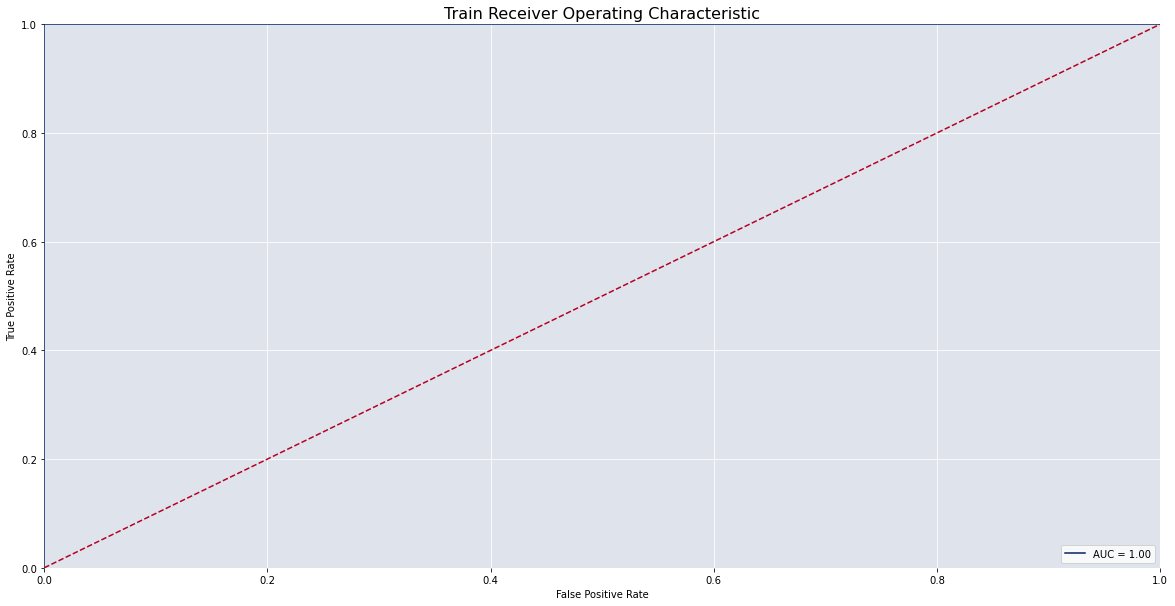

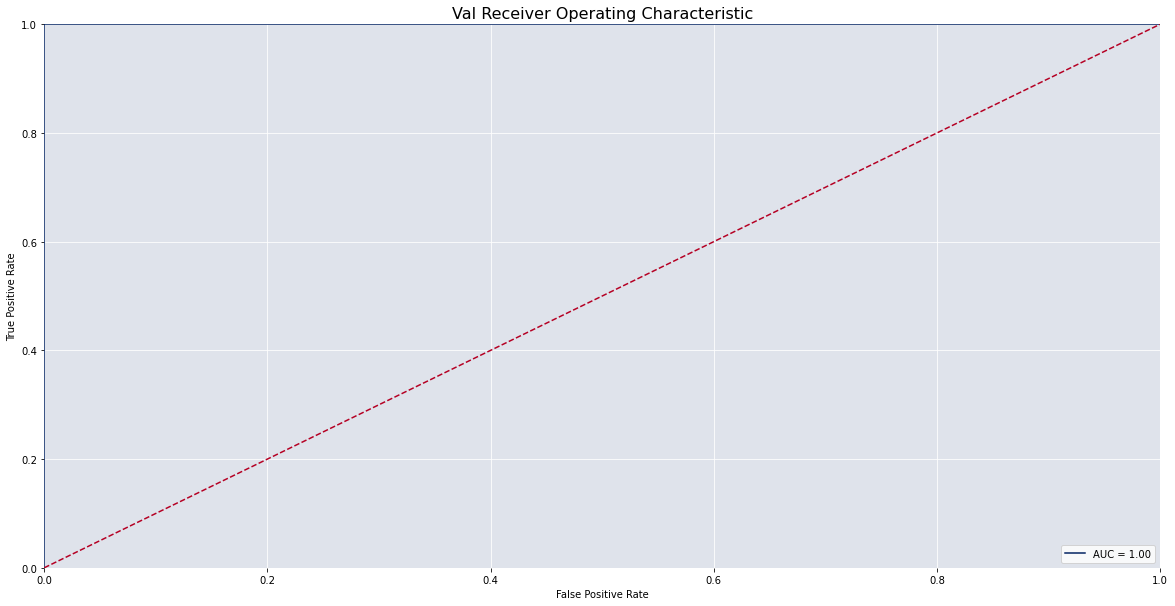

In [7]:
from ehr_functions.models import train_model

train_model('LogisticRegression', features, df[['PatientID', 'Over30']], metrics=['BinaryClassification', 'ROCCurve'])


# Multiple Output

Now we will try two output variables at the same time: Over the age of 30 and Under the age of 30.

Compute the second output variable

In [8]:
df['Under30'] = df['PatientAge'] < 30
df.head()

,PatientID,PatientAge,PatientGender,PatientCategory,Over30,Under30
0,1,48,M,B,True,False
1,2,95,F,C,True,False
2,3,92,M,C,True,False
3,4,19,F,B,False,True
4,5,88,M,A,True,False


Predict both output variables.  This will create two separate LogisticRegression models.

Train
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        92
        True       1.00      1.00      1.00       578

    accuracy                           1.00       670
   macro avg       1.00      1.00      1.00       670
weighted avg       1.00      1.00      1.00       670


Validation
Accuracy: 100.0
AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        34
        True       1.00      1.00      1.00       131

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165

Train AUC-ROC Curve
Val AUC-ROC Curve


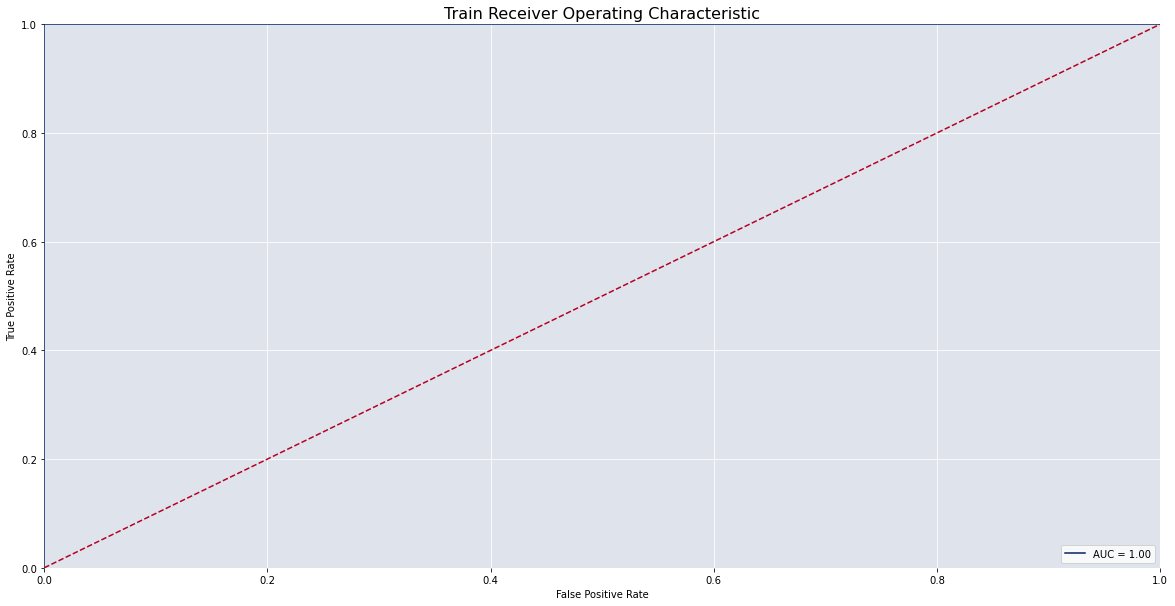

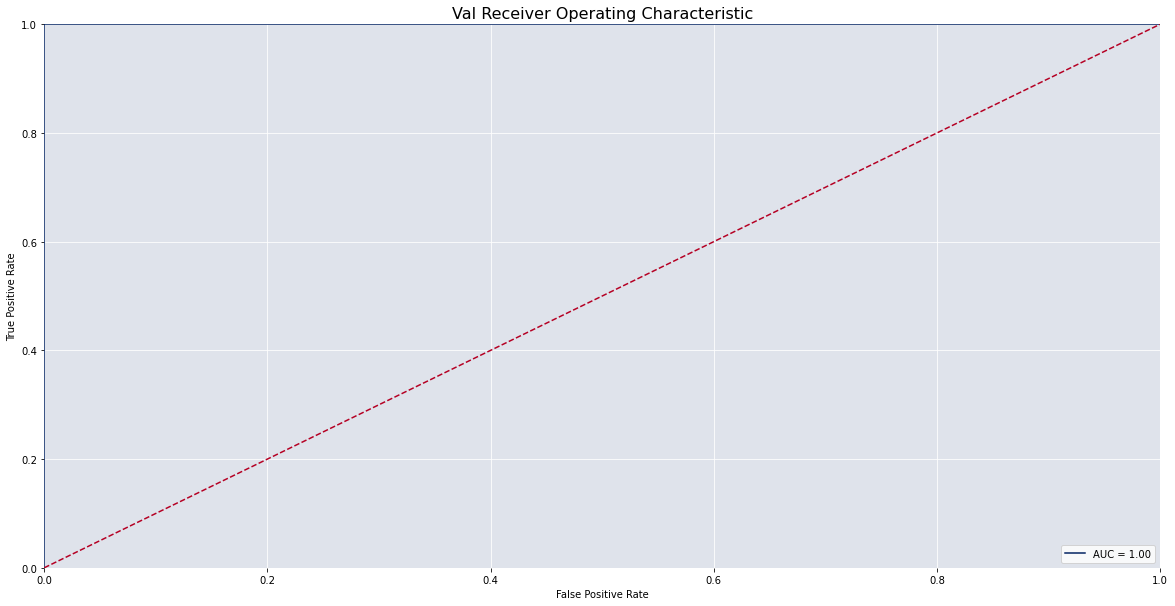

In [9]:
from ehr_functions.models import train_model

train_model('LogisticRegression', features, df[['PatientID', 'Over30']], metrics=['BinaryClassification', 'ROCCurve'])